# Сингулярное разложение матриц. Часть 1
__1.__ Найти с помощью NumPy SVD для матрицы

$$\left(\begin{array}{ccc}
{1} & {2} & {0}\\ 
{0} & {0} & {5}\\ 
{3} & {-4} & {2}\\ 
{1} & {6} & {5}\\ 
{0} & {1} & {0}
\end{array}\right)$$

### Решение

In [1]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, threshold=10)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
A = np.array([[1,  2, 0],
              [0,  0, 5],
              [3, -4, 2],
              [1,  6, 5],
              [0,  1, 0]])

U, d, V_T = np.linalg.svd(A)

V = V_T.T

D = np.zeros_like(A, dtype=float)
D[np.diag_indices(min(A.shape))] = d

In [3]:
def print_matrix(name, M):
    print(f'{name} = {M[0]}')
    for i in range(1, len(M)):
        print(M[i])

In [4]:
print(U)
# Матрица U

[[ 0.17  0.16 -0.53 -0.8  -0.16]
 [ 0.39 -0.53  0.61 -0.43  0.03]
 [-0.14 -0.82 -0.52  0.14  0.07]
 [ 0.89  0.06 -0.25  0.38 -0.06]
 [ 0.08  0.11 -0.08 -0.11  0.98]]


In [5]:
print(D)
# Матрица D

[[8.82 0.   0.  ]
 [0.   6.14 0.  ]
 [0.   0.   2.53]
 [0.   0.   0.  ]
 [0.   0.   0.  ]]


In [6]:
print(V)
# Матрица V

[[ 0.07 -0.37 -0.93]
 [ 0.72  0.67 -0.21]
 [ 0.69 -0.65  0.31]]


Проверим:

In [7]:
print(U @ D @ V_T)

[[ 1.  2.  0.]
 [ 0. -0.  5.]
 [ 3. -4.  2.]
 [ 1.  6.  5.]
 [-0.  1.  0.]]


__2.__ Для матрицы из предыдущего задания найти:

    а) евклидову норму,
    
    б) норму Фробениуса.
    
### Решение

    а) Евклидова норма

$\left \| A \right \|_{E}=\mu_{1}.$

In [8]:
eucl_norm = D[0][0]

print(f'{eucl_norm:.2f}')

8.82


Проверим

In [9]:
eucl_norm = np.linalg.norm(A, ord=2)

print(f'{eucl_norm:.2f}')

8.82


    б) норму Фробениуса.

$\left \| A \right \|_{F}=\sqrt{\sum_{k=1}^{r}\mu_{k}^{2}}.$

In [10]:
frob_norm = np.sqrt(sum([D[i][i]**2 for i in range(min(D.shape))]))

print(f'{frob_norm:.2f}')

11.05


In [11]:
frob_norm = np.linalg.norm(A, ord="fro")

print(f'{frob_norm:.2f}')

11.05


# Часть 2

__1.__ На примере данных о цветках Ириса:

* Разложть матрицу с помощью сингулярного разложения
* Избавиться от признаков, которые незначительно повлияют на выборку
* Вычислить значения признаков в новом базисе

### Решение

In [12]:
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

#### Загрузим данные по цветкам ириса

In [13]:
iris = datasets.load_iris()

In [14]:
df_iris = pd.DataFrame(iris.data)

df_iris.columns = iris.feature_names
df_iris['target'] = iris.target
df_iris['name'] = df_iris.target.apply(lambda x : iris.target_names[x])

df_iris = df_iris.sample(frac=1)

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
94,5.6,2.7,4.2,1.3,1,versicolor
73,6.1,2.8,4.7,1.2,1,versicolor
143,6.8,3.2,5.9,2.3,2,virginica
117,7.7,3.8,6.7,2.2,2,virginica
54,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
40,5.0,3.5,1.3,0.3,0,setosa
137,6.4,3.1,5.5,1.8,2,virginica
106,4.9,2.5,4.5,1.7,2,virginica
51,6.4,3.2,4.5,1.5,1,versicolor


In [15]:
feature_names = [iris.feature_names]  # Сюда буду складывать имена признаком для дальнейшей оценки

In [16]:
A = iris.data

#### Разложим матрицу A, используя сингулярное разложение

In [17]:
U, d, V_T = np.linalg.svd(A)

V = V_T.T

D = np.zeros_like(A, dtype=float)
D[np.diag_indices(min(A.shape))] = d

In [18]:
print(U)
# Матрица U

[[-0.06  0.13  0.   ... -0.09 -0.1  -0.08]
 [-0.06  0.11  0.07 ...  0.04 -0.03  0.01]
 [-0.06  0.12  0.   ...  0.03  0.2   0.14]
 ...
 [-0.09 -0.05 -0.04 ...  0.98 -0.02 -0.01]
 [-0.09 -0.06 -0.21 ... -0.02  0.94 -0.03]
 [-0.09 -0.05 -0.1  ... -0.01 -0.03  0.97]]


In [19]:
print(D[:5])
# 5 строк матрицы D

[[95.96  0.    0.    0.  ]
 [ 0.   17.76  0.    0.  ]
 [ 0.    0.    3.46  0.  ]
 [ 0.    0.    0.    1.88]
 [ 0.    0.    0.    0.  ]]


In [20]:
print(V)
# Матрица V

[[-0.75  0.28  0.5   0.32]
 [-0.38  0.55 -0.68 -0.32]
 [-0.51 -0.71 -0.06 -0.48]
 [-0.17 -0.34 -0.54  0.75]]


#### Понижаем ранг матрицы с данными на 1 с минимальными потерями

Для этого зануляем самое мелкое сингулярное число в матрице $D$

In [21]:
n = min(D.shape) - 1
D[n][n] = 0

#### Найдем новые значения признаков

In [22]:
A_1 = U @ D @ V_T
print(A_1)
# Матрица A с рангом, пониженным с минимальными потерями

[[5.1  3.5  1.4  0.2 ]
 [4.87 3.03 1.45 0.13]
 [4.69 3.21 1.31 0.19]
 ...
 [6.46 3.04 5.27 1.9 ]
 [6.19 3.41 5.42 2.27]
 [5.95 2.95 5.02 1.92]]


#### Найдем матрицу перехода к новому базису $V$ вторым способом, используя выражение

$$A^{T}AV=VD^{2}.$$

In [23]:
A_T_A = A.T @ A

In [24]:
print(A_T_A)
# Матрица A_T * A

[[5223.85 2673.43 3483.76 1128.14]
 [2673.43 1430.4  1674.3   531.89]
 [3483.76 1674.3  2582.71  869.11]
 [1128.14  531.89  869.11  302.33]]


In [25]:
U2, d2, V2_T = np.linalg.svd(A_T_A)

V2 = V2_T.T

D2 = np.zeros_like(A_T_A, dtype=float)
D2[np.diag_indices(min(A_T_A.shape))] = d2

In [26]:
print(U2)
# Матрица U из разложения матрицы A_T * A

[[-0.75 -0.28  0.5   0.32]
 [-0.38 -0.55 -0.68 -0.32]
 [-0.51  0.71 -0.06 -0.48]
 [-0.17  0.34 -0.54  0.75]]


In [27]:
print(D2)
# Матрица D из разложения матрицы A_T * A

[[9208.31    0.      0.      0.  ]
 [   0.    315.45    0.      0.  ]
 [   0.      0.     11.98    0.  ]
 [   0.      0.      0.      3.55]]


In [28]:
print(V2)
# Матрица D из разложения матрицы A_T * A

[[-0.75 -0.28  0.5   0.32]
 [-0.38 -0.55 -0.68 -0.32]
 [-0.51  0.71 -0.06 -0.48]
 [-0.17  0.34 -0.54  0.75]]


#### Переведем новые значения признаков после оптимизации к новому базису

Один из признаков должен занулиться.

Матрица перехода к новому базису это $V$, матрица правых сингулярных векторов из SVD разложения $A$ или $V$ из SVD разложения $A^{T}A$.

In [29]:
print(A_1 @ V)

[[-5.91  2.3   0.01 -0.  ]
 [-5.57  1.97  0.24 -0.  ]
 [-5.45  2.1   0.02 -0.  ]
 ...
 [-9.03 -0.89 -0.14 -0.  ]
 [-9.11 -1.   -0.74 -0.  ]
 [-8.49 -0.92 -0.33 -0.  ]]


#### Избавимся также и от двух признаков для сравнения

In [30]:
D[n - 1][n - 1] = 0
print(D[:4])

[[95.96  0.    0.    0.  ]
 [ 0.   17.76  0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]]


In [31]:
A_2 = U @ D @ V_T
print(A_2)

[[5.1  3.51 1.4  0.2 ]
 [4.75 3.2  1.46 0.26]
 [4.69 3.22 1.31 0.19]
 ...
 [6.53 2.95 5.26 1.82]
 [6.56 2.92 5.38 1.87]
 [6.12 2.73 5.   1.74]]


In [32]:
print(A_2 @ V)

[[-5.91  2.3  -0.   -0.  ]
 [-5.57  1.97 -0.   -0.  ]
 [-5.45  2.1  -0.   -0.  ]
 ...
 [-9.03 -0.89 -0.   -0.  ]
 [-9.11 -1.   -0.   -0.  ]
 [-8.49 -0.92 -0.   -0.  ]]


#### Сформируем новый датасет из трех новых признаков и также из двух

In [33]:
np.delete(A_1 @ V, 3, axis=1)

array([[-5.91,  2.3 ,  0.01],
       [-5.57,  1.97,  0.24],
       [-5.45,  2.1 ,  0.02],
       ...,
       [-9.03, -0.89, -0.14],
       [-9.11, -1.  , -0.74],
       [-8.49, -0.92, -0.33]])

In [34]:
new_features_1 = []
for i in range(3):
    new_features_1.append(f'Feature {i}')
feature_names.append(new_features_1)
    
df_iris_1 = pd.DataFrame(np.delete(A_1 @ V, 3, 1), columns=new_features_1)
df_iris_1['target'] = df_iris['target']
df_iris_1['name'] = df_iris_1.target.apply(lambda x : iris.target_names[x])

In [35]:
df_iris_1

,Feature 0,Feature 1,Feature 2,target,name
0,-5.912747,2.302033,0.007402,0,setosa
1,-5.572482,1.971826,0.244592,0,setosa
2,-5.446977,2.095206,0.015029,0,setosa
3,-5.436459,1.870382,0.020505,0,setosa
4,-5.875645,2.328290,-0.110338,0,setosa
...,...,...,...,...,...
145,-9.226517,-0.931293,-0.204095,2,virginica
146,-8.566265,-1.039134,0.159305,2,virginica
147,-9.025923,-0.885027,-0.143421,2,virginica
148,-9.105599,-0.996416,-0.737103,2,virginica


In [36]:
np.delete(A_2 @ V, [2, 3], axis=1)

array([[-5.91,  2.3 ],
       [-5.57,  1.97],
       [-5.45,  2.1 ],
       ...,
       [-9.03, -0.89],
       [-9.11, -1.  ],
       [-8.49, -0.92]])

In [37]:
new_features_2 = new_features_1[:2]
feature_names.append(new_features_2)

df_iris_2 = pd.DataFrame(np.delete(A_2 @ V, [2, 3], axis=1), columns=new_features_2)
df_iris_2['target'] = df_iris['target']
df_iris_2['name'] = df_iris_2.target.apply(lambda x : iris.target_names[x])

In [38]:
df_iris_2

,Feature 0,Feature 1,target,name
0,-5.912747,2.302033,0,setosa
1,-5.572482,1.971826,0,setosa
2,-5.446977,2.095206,0,setosa
3,-5.436459,1.870382,0,setosa
4,-5.875645,2.328290,0,setosa
...,...,...,...,...
145,-9.226517,-0.931293,2,virginica
146,-8.566265,-1.039134,2,virginica
147,-9.025923,-0.885027,2,virginica
148,-9.105599,-0.996416,2,virginica


#### Посмотрим на матрицы корреляций 

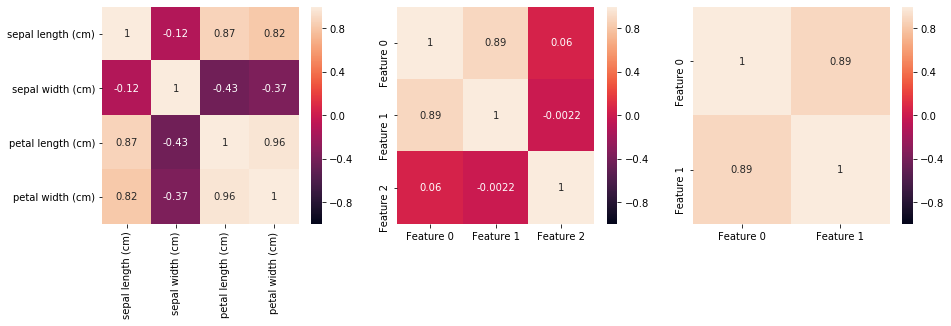

In [39]:
corr = df_iris[iris.feature_names].corr()
corr_1 = df_iris_1[new_features_1].corr()
corr_2 = df_iris_2[new_features_2].corr()

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(corr, annot=True, ax=ax[0], vmin=-1, vmax=1)
sns.heatmap(corr_1, annot=True, ax=ax[1], vmin=-1, vmax=1)
sns.heatmap(corr_2, annot=True, ax=ax[2], vmin=-1, vmax=1)

plt.show()

#### Узнаем потерю точности

In [40]:
model = KMeans(n_clusters=3)

scaler = StandardScaler()

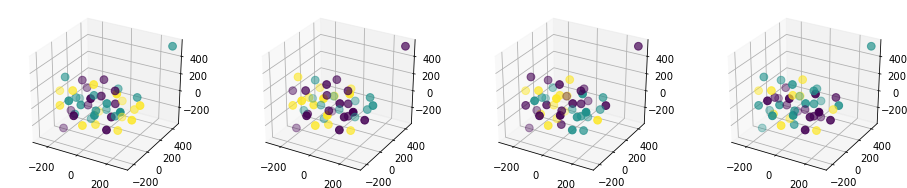

In [41]:
scores = []

my_metrics = {'ARI': metrics.adjusted_rand_score, 
              'AMI': metrics.adjusted_mutual_info_score, 
              'Homogenity': metrics.homogeneity_score,
              'Completeness': metrics.completeness_score,
              'V-measure': metrics.v_measure_score
             }

fig = plt.figure(figsize=plt.figaspect(0.2))

for i, df in enumerate([df_iris, df_iris_1, df_iris_2]):
    X = df[feature_names[i]]
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    if i == 0:
        tsne_3 = TSNE(n_components=3, learning_rate=250, random_state=10)
        X_train_tsne_3 = tsne_3.fit_transform(X_test_scaled)
        
        ax = fig.add_subplot(1, 4, 1, projection='3d')
        ax.scatter(X_train_tsne_3[:, 0], X_train_tsne_3[:, 1], X_train_tsne_3[:, 2], c=y[-45:], s=60)
    
    model.fit(X_train_scaled)

    y_pred = model.predict(X_test_scaled)

    temp_dict = {}
    for metric in my_metrics:
        temp_dict[metric] = my_metrics[metric](y_pred, y_test)

    scores.append(temp_dict)
    
    ax = fig.add_subplot(1, 4, i + 2, projection='3d')
    ax.scatter(X_train_tsne_3[:, 0], X_train_tsne_3[:, 1], X_train_tsne_3[:, 2], c=y_pred, s=60)
    
    
results = pd.DataFrame(data=scores, columns=my_metrics.keys(), index=['Original', '3 features', '2 features'])

In [43]:
results

,ARI,AMI,Homogenity,Completeness,V-measure
Original,0.587005,0.635684,0.649500,0.654455,0.651968
3 features,0.760450,0.727948,0.740607,0.739435,0.740021
2 features,0.843550,0.840248,0.853598,0.841345,0.847427


Странно, но почему-то при удалении признаков оценка улучшается. Хотелось бы понять почему...